In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd



import numpy as np
import matplotlib.pyplot as plt


from glob import glob

import os, sys

sys.path.append('/Users/silas/Documents/switchdrive/')
import helper_scripts as hs

from io import StringIO


import seaborn as sns
#from helper_scripts import DimensionalReduction,MetaTable
from helper_scripts import effect_plot as EP

%run metascripts.py


In [2]:
working_dir='../WD/'

In [3]:
metadata= pd.read_table(f'../metadata.tsv',index_col=0)

# Gene cluster

In [4]:
Clusters= pd.read_csv('../WD/genomes/clustering/orf_2_genome.tsv',sep='\t',index_col=0)

In [5]:
Clusters.head()

,Gene,Contig,KO,Bin,Genome
ORF,,,,,
shRTF1_0_1,Gene0000001,shRTF1_0,K02584,shRTF1_maxbin_005,MAG038
shRTF1_0_2,Gene0000002,shRTF1_0,NaN,shRTF1_maxbin_005,MAG038
shRTF1_0_3,Gene0000003,shRTF1_0,K01915,shRTF1_maxbin_005,MAG038
shRTF1_0_4,Gene0000004,shRTF1_0,K01912,shRTF1_maxbin_005,MAG038
shRTF1_0_5,Gene0000005,shRTF1_0,K09765,shRTF1_maxbin_005,MAG038


In [6]:
K= Clusters.groupby(['Genome','KO']).size().unstack().fillna(0)

In [7]:
Description= pd.Series(K.columns, index=K.columns)
Description=Description.loc[~(Description.index.duplicated()| Description.index.isnull())]
Description.name='Description'

## PCA on genes

# aggregate genes

## Relab

# Rawcounts clr

Genes.PF03279/Genes.PF02606

# PCA

# metatable

# check abundance

In [8]:
sig_mags= ['MAG118', 'MAG035', 'MAG031', 'MAG001', 'MAG099', 'MAG012', 'MAG082',
       'MAG040', 'MAG086', 'MAG058', 'MAG017', 'MAG088', 'MAG028', 'MAG034',
       'MAG051']

In [10]:
genes_of_interest= pd.read_excel('../KEGGgenes/kegg_enzymes.xlsx',index_col=0)

In [11]:
Description= genes_of_interest.index+' '+genes_of_interest['ENYZME NAME']

In [17]:
%run ../notebooks/metascripts.py

<Figure size 432x288 with 0 Axes>

Series([], Name: ENYZME NAME, dtype: object)


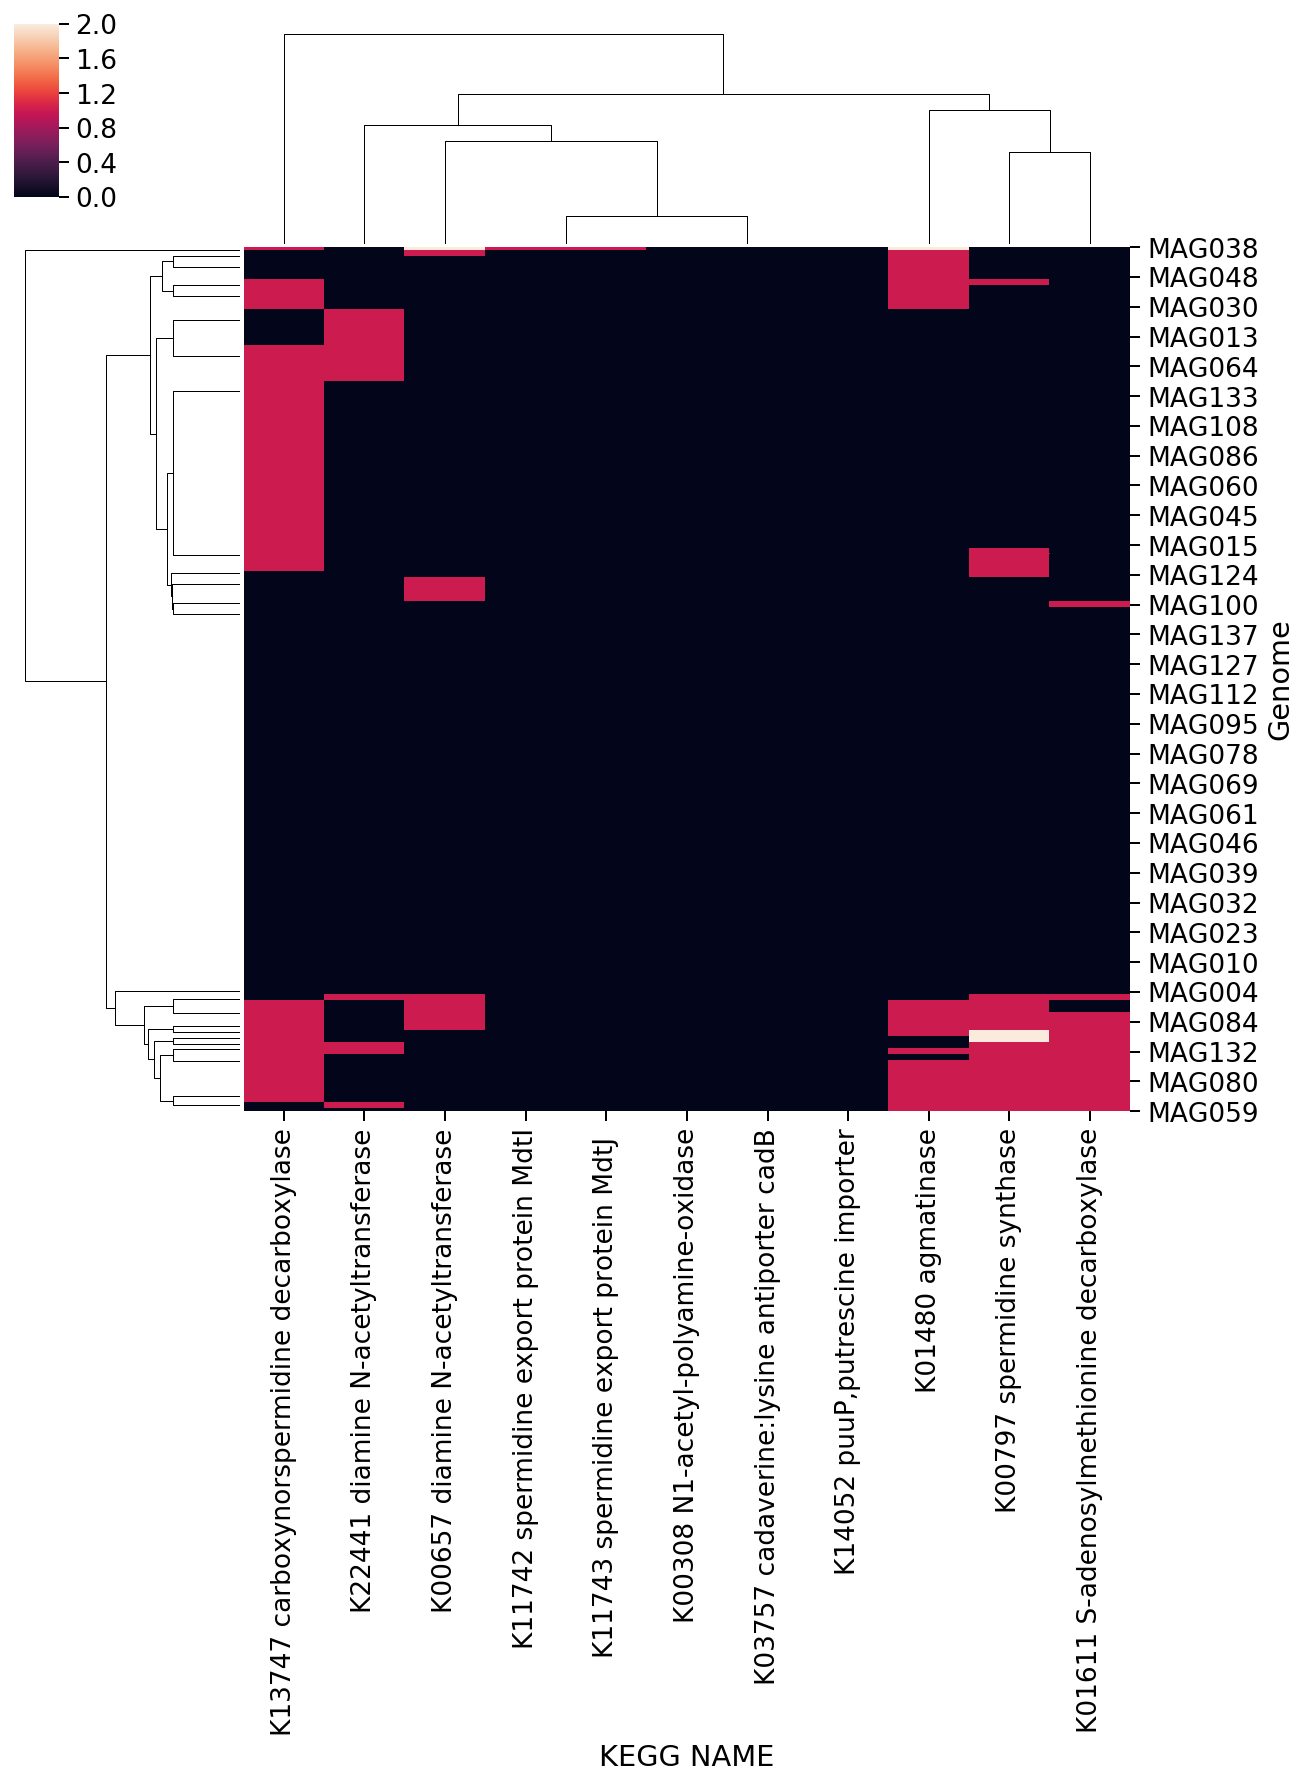

In [19]:
df=K.loc[:,genes_of_interest.index].fillna(0)
print(genes_of_interest.loc[df.isnull().any(),'ENYZME NAME'])


#df= df.loc[df.sum(1)>0,df.sum(0)>0]
cgi= sns.clustermap(df,#row_cluster=False, yticklabels= Labels.loc[df.index],
               xticklabels=Description[df.columns])

#cgi.ax_heatmap.set_yticklabels(Labels.loc[df.index])

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

genus= Tax.loc[df.index,"genus"].unique()
TaxColors= pd.Series(sns.color_palette("Paired",n_colors=len(genus)),index=sorted(genus))

with PdfPages('../KEGGgenes/results.pdf') as pdf:
    for k in df.columns:
    
    
        
        plot_data= D[df.index[df[k]>0]].groupby(Tax.genus,axis=1).sum().groupby([metadata.Source,metadata.Group]).mean()

        plot_data=plot_data.loc[[('Cecum', 'RT'),('Cecum', 'Hot'),('Feces', 'RT'), ('Feces', 'Hot')]]
        plot_data= plot_data.loc[:,plot_data.max()>0.001]*100
        ax=plot_data.plot.bar(stacked=True,color=TaxColors[plot_data.columns],figsize=(8, 5))
        handles, labels=ax.get_legend_handles_labels()

        ax.legend(reversed(handles),reversed(labels),bbox_to_anchor=(1,1))

        ax.set_ylabel('Relative abundance\nof bacteria [%]')
        ax.set_xticklabels(['RT','Hot']*2,rotation=0)
        ax.set_xlabel('Cecum                     Feces')
        ax.set_title(k+" "+genes_of_interest.loc[k,'ENYZME NAME'])
        
        plt.tight_layout()
    
        pdf.savefig()
        plt.show()

In [85]:
!open ../KEGGgenes/results.pdf